<a href="https://colab.research.google.com/github/lisabroadhead/udemy-tensorflow/blob/main/004_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VD: 73

## 02 neural network classification with tensorflow video

## Introduction to meural networks classification with TensorFlow

in this notebook we're going to learn how to writd neural networks for classification problems

A classifctions is where you try to classify something as one thing or another:
1. Binary
2. Multi class
3. Multi label

### creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000
# Create circles
X,y = make_circles(n_samples, noise=0.03, random_state=42)

In [5]:
# Check circles
# X
X.shape

(1000, 2)

In [4]:
# Cheeck labesl
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [6]:
# Our data is a little hard to understand right now, so lets visulaize it
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


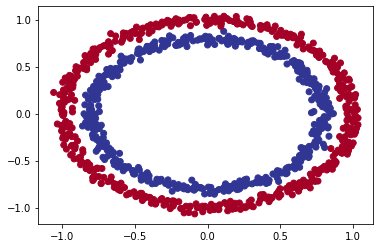

In [8]:
# Visulaize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

### whats the difference between the above model and linear regression

- our other porblems we all going in one direction, line
- this one goes in a circle, shaped, no start and end point 



In [12]:
## Input and output shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [13]:
# How many sampes we're working with
len(X), len(y)

(1000, 1000)

In [16]:
# view the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [17]:
### Steps in modeling
import tensorflow as tf

In [24]:
# pre
tf.random.set_seed(42)

# 1. model
model = tf.keras.Sequential([
  tf.keras.Input(shape=(1000,2)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. compils
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. fit - may need to spilt our data into training and test
# model(X, y, epochs=100)

## VD:75

In [31]:
import tensorflow as tf


In [33]:
# pre
tf.random.set_seed(42)

# 1. model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. compile
model.compile(
  loss = tf.keras.losses.BinaryCrossentropy(),
  optimizer=tf.keras.optimizers.SGD(),
  metrics=['accuracy']
)

# 3. fit
model.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


# How do we improve our model
1. more loayers
2. learninr rate
3. more epochs
4. few things we dind't use in the accuracy model
5. training and test data

In [35]:
# Train for longer
model.fit(X,y,epochs=200,verbose=0)
model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [37]:
# since we're workingon a binary classification model and out model is around 50% accuracy, it's performing as if it sguessing
# so lets add another layer

In [39]:
# pre
tf.random.set_seed(42)

# 1.
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. compile
model_2.compile(
  loss=tf.keras.losses.BinaryCrossentropy(),
  optimizer=tf.keras.optimizers.SGD(),
  metrics=['accuracy']
)

# 3. fit model
model_2.fit(X,y,epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 1ms/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.7037 - accuracy: 0.5010
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.4960
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.4990
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6984 - accuracy: 0.4980
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4960
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.4920
Epoch 11/

## VD: 76

### Improving our Model

1. create a model - add more layers, in crease hidden layers, increase the numb of hidden layers
2. compiling a model - chose a different optimization function: Adam, SGD, learning rate
3. fitting a model - more epochs

Hyperparameters - changeable parameters

Alot of ML and DL is trying things and seeing if they work - its not an exact science

In [40]:
# pre
tf.random.set_seed(42)

# 1. model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                            
])

#2. compile
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. fit
model_3.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.9658 - accuracy: 0.4490
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7229 - accuracy: 0.4390
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5040
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4480
Epoch 11/

## VD: 77

- visualize our prediction data

In [41]:
model_3.predict(X)

array([[0.48793244],
       [0.55887616],
       [0.56292856],
       [0.5705068 ],
       [0.44141158],
       [0.5738823 ],
       [0.5576486 ],
       [0.48246637],
       [0.47755855],
       [0.5750227 ],
       [0.5148492 ],
       [0.53087693],
       [0.5643773 ],
       [0.45787305],
       [0.45052725],
       [0.46129915],
       [0.54055846],
       [0.46380937],
       [0.54798055],
       [0.50375706],
       [0.50630444],
       [0.58775467],
       [0.45902476],
       [0.4912331 ],
       [0.5832161 ],
       [0.57042587],
       [0.5523935 ],
       [0.4631735 ],
       [0.4577342 ],
       [0.4544098 ],
       [0.47872254],
       [0.57856053],
       [0.55546165],
       [0.46339142],
       [0.45849174],
       [0.589867  ],
       [0.57247376],
       [0.529744  ],
       [0.45870548],
       [0.51092875],
       [0.49994174],
       [0.5463086 ],
       [0.5109905 ],
       [0.45797244],
       [0.52232754],
       [0.53888047],
       [0.44872287],
       [0.544

# To visulaize our model's perdictions, lets create a function 'plot_decision_boundary, this function will tak in a trained model feates(X), labels y and create a mesh grid

1. Take in and trained model, feature (X)
 and labels (y)
2. Create a meshgrid of the different X labels
3. Make perdictions acrtoss the mesh grid
4. plat the perdictions as well as the line betwen the zones (where each unique class falls)



In [43]:
import numpy as np

In [49]:
def plot_decision_boundary(model,X,y):
    """ Plot the decisions boundary by a model perdicting on X """
    # Define the axis boundaries of the plat and create the meshgrid
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.01
    y_min, y_max = X[:,0].min() - 0.1, X[:,0].max() + 0.01
    xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                         np.linspace(y_min,y_max,100))
    
    # Creat X values
    x_in = np.c_[xx.ravel(), yy.ravel()]

    #make perdictions
    y_pred = model.predict(x_in)

    # check for multi-class
    if len(y_pred[0]) > 1:
      y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
      print("doing binary classofoication")
      y_pred = np.round(y_pred).reshape(xx.shape)

    #plot
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classofoication


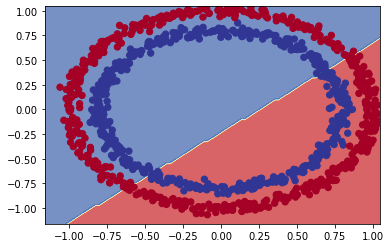

In [50]:
# Check our the perdictions our model is making
plot_decision_boundary(model = model_3,
                       X=X,
                       y=y)

In [ ]:
# Looks like our data is trying to draw a staigh line thorugh our data
# https://cs231n.github.io/neural-networks-case-study/
# https://madewithml.com/

## VD: 78 - updates/notes video on tensorflow version

## VD: 79